# Flexão composta em vigas

$\sigma_x = \frac{N}{A} - \frac{M_z y}{I_z} + \frac{M_y z}{I_y}$ <br>

Onde:<br>
* **N** é a força normal na seção
* **A** é a área da seção
* **$M_z$**, **$M_y$** são os momentos fletores em torno dos eixos z e y, respectivamente
* **$I_z$**, **$I_y$** são os momentos de inércia em torno dos eixos z e y, respectivamente
* **z**, **y** são as coordenadas da superfície da seção transversal

## Seção retangular



DISTRIBUIÇÃO DE TENSÕES DE FLEXÃO EM UMA VIGA DE SEÇÃO RETANGULAR
Momebnto em torno de z:             Mz        = 11.00 kNm
Momebnto em torno de y:             My        = 11.00 kNm
Momento fletor resultante:          M         = 15.56 kNm
Ângulo do momento solicitante:      theta     = 45.00 °
Esforço normal:                     N         = -200.00 kN
Momento de inércia em relação a z:  Iz        = 106666.67 cm4
Momento de inércia em relação a y:  Iy        = 26666.67 cm4
Tensão normal máxima:               sigma_max = 3.69 MPa
Tensão normal mínima:               sigma_min = -8.69 MPa
Inclinação da linha neutra:         alpha     = 81.15 °
-----------------------------------------------------------------



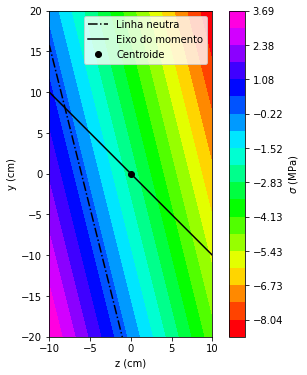

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#----------------------------------------------------
#Entrada de dados
#----------------------------------------------------
b = 20 #cm (largura da base)
h = 40 #cm (altura)
Mz = 11 #kNm (momento em torno de z)
My = 11 #kNm (momento em torno de y)
N = -200 #kN



#----------------------------------------------------
#propriedade geométrica da seção
#----------------------------------------------------
Iz = b*(h**3)/12
Iy = h*(b**3)/12
A = b*h

#----------------------------------------------------
#Parâmetros adicionais
#----------------------------------------------------
theta = (180/np.pi)*np.arctan(My/Mz) #(inclinação do momento resultante)
M = np.sqrt(Mz**2+My**2)  #momento resultante na seçao

#----------------------------------------------------
#Criação da malha
#----------------------------------------------------
npz = 100
npy = 100
z = np.linspace(-b/2,b/2,npz)
y = np.linspace(-h/2,h/2,npy)
Z, Y = np.meshgrid(z, y)

#----------------------------------------------------
#Cálculo das tensões
#----------------------------------------------------
sigma = 10*(N/A)+10*(-100*Mz*Y/Iz + 100*My*Z/Iy)
sigma_max = np.max(sigma)
sigma_min = np.min(sigma)

faixa = np.linspace(sigma_min, sigma_max, 20)



#----------------------------------------------------
#Vizualização dos resultados
#----------------------------------------------------

#Criação do gráfico
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

# Plotagem do contorno de valores
contour = ax.contourf(-Z, Y, sigma, levels = faixa, cmap = 'gist_rainbow',)

# Adição da barra de cores
cbar = fig.colorbar(contour)
cbar.set_label('$\sigma$ (MPa)')

# Definição dos limites do gráfico
ax.set_xlim(-b/2, b/2)
ax.set_ylim(-h/2, h/2)
ax.set_xlabel('z (cm)')
ax.set_ylabel('y (cm)')


#Linha neutra
z = np.linspace(-b/2, b/2, 10)
y = (Iz/(100*Mz))*(N/A + (100*My*z)/Iy)
LN = ax.plot(-z,y,
    'k-.', label='Linha neutra'
)
alpha = (180/np.pi)*np.arctan(y[0]/z[0])


#Eixo de atuação do momento fletor
z = np.linspace(-b/2, b/2, 10)
y = -np.tan((np.pi/180)*theta)*z
EM = ax.plot(z,y,
    'k-', label='Eixo do momento'
)

#Centroide da seção
CG = ax.plot(0,0,
    'ko', label='Centroide'
)

#Legenda
ax.legend()


# Apresentação dos dados
print('')
print('')
print('=================================================================')
print('DISTRIBUIÇÃO DE TENSÕES DE FLEXÃO EM UMA VIGA DE SEÇÃO RETANGULAR')
print('=================================================================')
print('Momebnto em torno de z:             Mz        = %.2f kNm' % Mz)
print('Momebnto em torno de y:             My        = %.2f kNm' % My)
print('Momento fletor resultante:          M         = %.2f kNm' % M)
print('Ângulo do momento solicitante:      theta     = %.2f °' % theta)
print('Esforço normal:                     N         = %.2f kN' % N)
print('Momento de inércia em relação a z:  Iz        = %.2f cm4' % Iz)
print('Momento de inércia em relação a y:  Iy        = %.2f cm4' % Iy)
print('Tensão normal máxima:               sigma_max = %.2f MPa' % sigma_max)
print('Tensão normal mínima:               sigma_min = %.2f MPa' % sigma_min)
print('Inclinação da linha neutra:         alpha     = %.2f °' % alpha)
print('-----------------------------------------------------------------')
print('')
plt.show()
